HW 1: Q1: 


In [2]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# tf.config.set_visible_devices([], 'GPU')  # to turn the gpu off 

2025-03-19 15:47:47.809053: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 15:47:47.815338: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 15:47:47.856740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 15:47:47.893894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742386667.930164    4228 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742386667.94

Q1: 2-1-1: loading the dataset: please note that i run this code locally so i dont use colab commands for loading the dataset

In [3]:
# loading the dataset:
    # define directory:
relative_path=  "database"
database_name = "creditcard.csv"
base_dir = os.getcwd()
dataset_path = os.path.join(base_dir, relative_path, database_name)

df=pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Q1: 2-1-2: showing a summary of data:

In [4]:
# showing a summary of data: first 10 rows
n = 3
df.head(n)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Q1: 2-1-3: bar chart for classes' distribution

In [6]:
# finding classes and their counts:
classes, counts = np.unique(df.Class.values, return_counts=True)
print(f"classes are :  {classes}")
print(f" counts of classes are :{counts} ")

classes are :  [0 1]
 counts of classes are :[284315    492] 


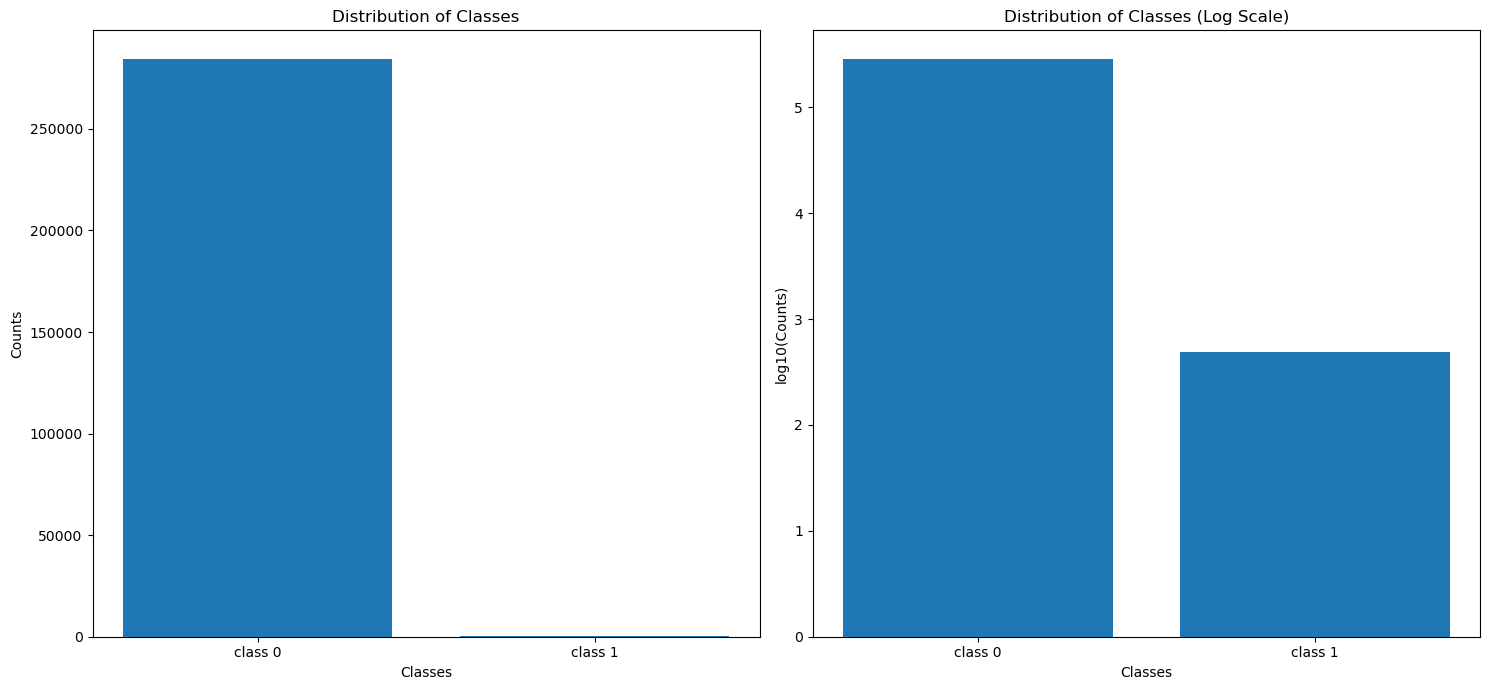

In [7]:
# ploting the classes:

class_labels=[]
class_counts=[]
for i , count in enumerate(counts):
    class_labels.append("class " + str(classes[i]))
    class_counts.append( count)

fig, axes= plt.subplots(1, 2, figsize=(15,  7)) 

# Normal bar chart
axes[0].bar(class_labels, class_counts)
axes[0].set_title('Distribution of Classes')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Counts')

# # i use the log plot to show rhe difference in the order of data properly: for class 0 i
axes[1].bar(class_labels, np.log10(class_counts))
axes[1].set_title('Distribution of Classes (Log Scale)')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('log10(Counts)')

plt.tight_layout() 
plt.show()

Q1: 2-1-5: data normalization:

In [8]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# extract data: x and y
x= df.iloc[:, :-1]
y= df.iloc[:,-1]

# comment/uncomment for each option:
# scaler= StandardScaler()
scaler= MinMaxScaler(feature_range=(-1,1))

x_scaled= scaler.fit_transform(x)



Q1: 2-1-6: spliting the data:

In [9]:
from sklearn.model_selection import train_test_split
test_train_portion  = 0.3
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=test_train_portion, stratify=y, random_state=42) 

Q1: 3-1-1: define networks:

In [9]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout
from keras.regularizers import l2
row, columns = np.shape(x_scaled)
hidden_layer_neurons = 64
# model1 and model2 with no kernel_regularizer=l2
# model3 and model4 with kernel_regularizer=l2
# model2 and model4 with dropout

model1= Sequential([ # model1 has no dropput and kernel_regularizer
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2= Sequential([    # model2 has dropout
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model3= Sequential([ # model3 has no dropput but has kernel_regularizer
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons, kernel_regularizer=l2(0.0001), activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

model4= Sequential([    # model4 has dropout and kernel_regularizer
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])



E0000 00:00:1742331336.518117   91669 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742331336.533399   91669 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


models' summary:

In [10]:
model1.summary()
model2.summary()
model3.summary()
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# import tensorflow as tf
# print ( tf.config.list_logical_devices('GPU'))

Q1: 3-1-2: train models:

In [12]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1=model1.fit(x_train, y_train, epochs=40, batch_size=32,validation_split=0.2)


Epoch 1/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 713us/step - accuracy: 0.9862 - loss: 0.0337 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 2/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 695us/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 3/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 696us/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 4/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 5/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 687us/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 694us/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 7/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 690us/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 8/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 3s 691us/step - accuracy: 0.9994 -

In [13]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2=model2.fit(x_train, y_train, epochs=40, batch_size=32,validation_split=0.2)

Epoch 1/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 806us/step - accuracy: 0.9982 - loss: 0.0224 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 2/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 845us/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 3/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 984us/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 4/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 5/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 975us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 6/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 929us/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 7/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0037
Epoch 8/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 823us/step - accuracy: 0.9995 -

In [14]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3=model3.fit(x_train, y_train, epochs=40, batch_size=32,validation_split=0.2)

Epoch 1/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 827us/step - accuracy: 0.9986 - loss: 0.0180 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 2/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 748us/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9992 - val_loss: 0.0048
Epoch 3/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 733us/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 4/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 768us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 5/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 756us/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 6/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 736us/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 7/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 736us/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 8/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 732us/step - accuracy: 0.9994 -

In [15]:

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4=model4.fit(x_train, y_train, epochs=40, batch_size=32,validation_split=0.2)

Epoch 1/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 839us/step - accuracy: 0.9974 - loss: 0.0261 - val_accuracy: 0.9989 - val_loss: 0.0064
Epoch 2/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 778us/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 3/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 771us/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9990 - val_loss: 0.0052
Epoch 4/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 754us/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 5/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 747us/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 6/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 793us/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 795us/step - accuracy: 0.9993 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0045
Epoch 8/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 773us/step - accuracy: 0.9993 -

figures for training: history1 -> history4:

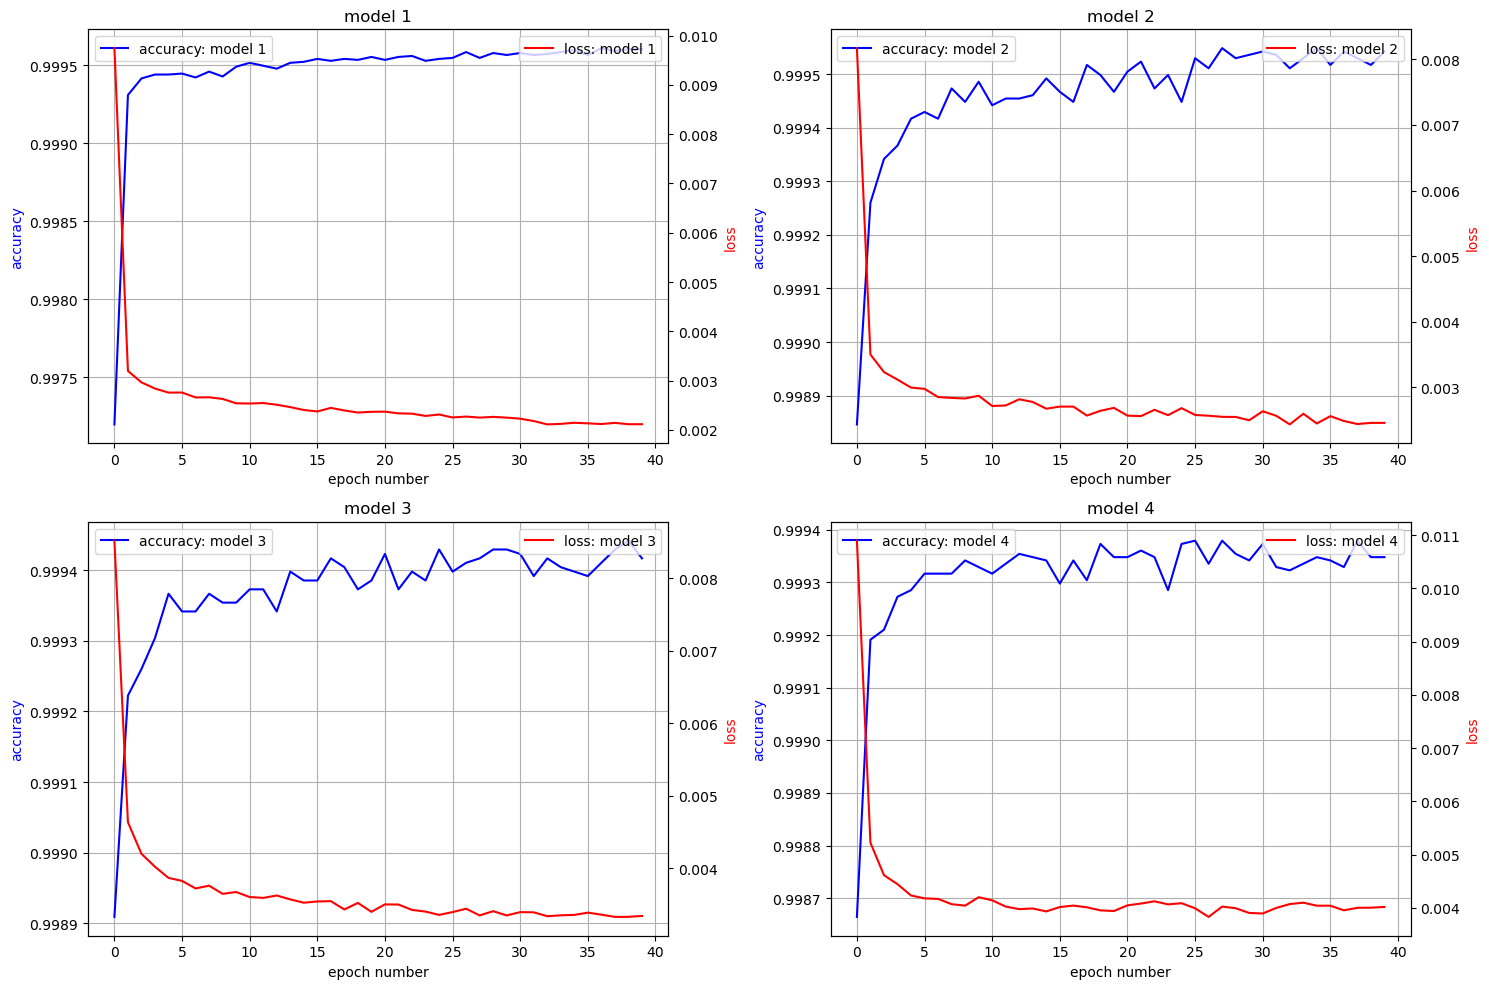

In [16]:
histories=[history1,history2,history3,history4]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flat
for i, history in enumerate(histories):
    accuracy_data= history.history['accuracy']
    loss_data= history.history['loss']

    axes2 = axes[i].twinx() 

    axes[i].plot(accuracy_data, label=f'accuracy: model {i+1}',color = 'b')
    axes[i].set_ylabel('accuracy', color='b')

    axes2.plot(loss_data, label=f'loss: model {i+1}', color='r')
    axes2.set_ylabel('loss', color='r')

    axes[i].set_title(f'model {i+1}')
    axes[i].set_xlabel('epoch number')

    axes[i].legend()
    axes2.legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Q1: 3-1-3: eval:

predicting model:1
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step
predicting model:2
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step
predicting model:3
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 299us/step
predicting model:4
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step


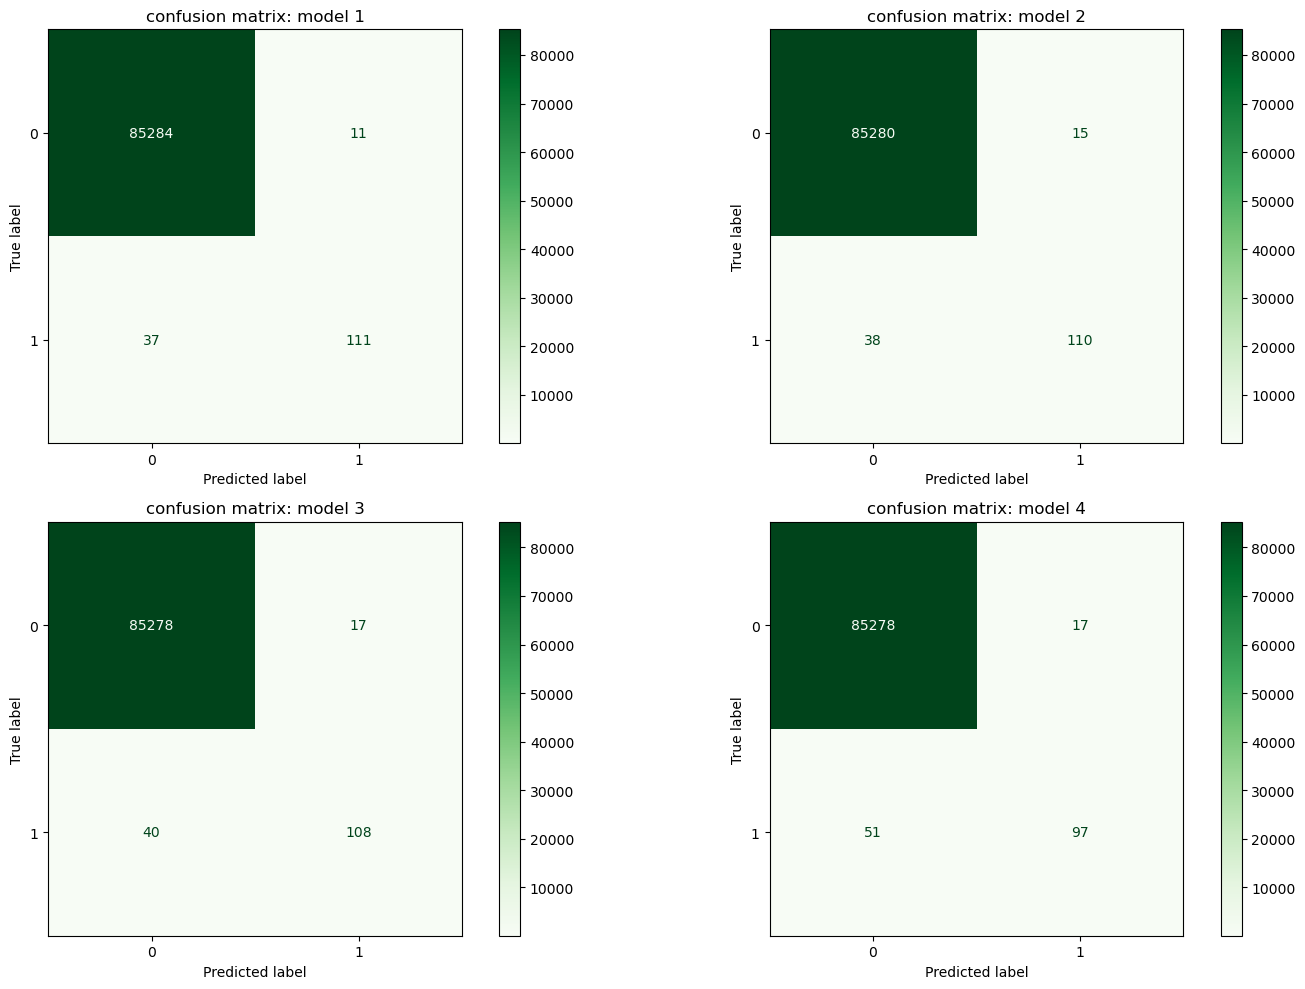

predicting model:1
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step
predicting model:2
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step
predicting model:3
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step
predicting model:4
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step


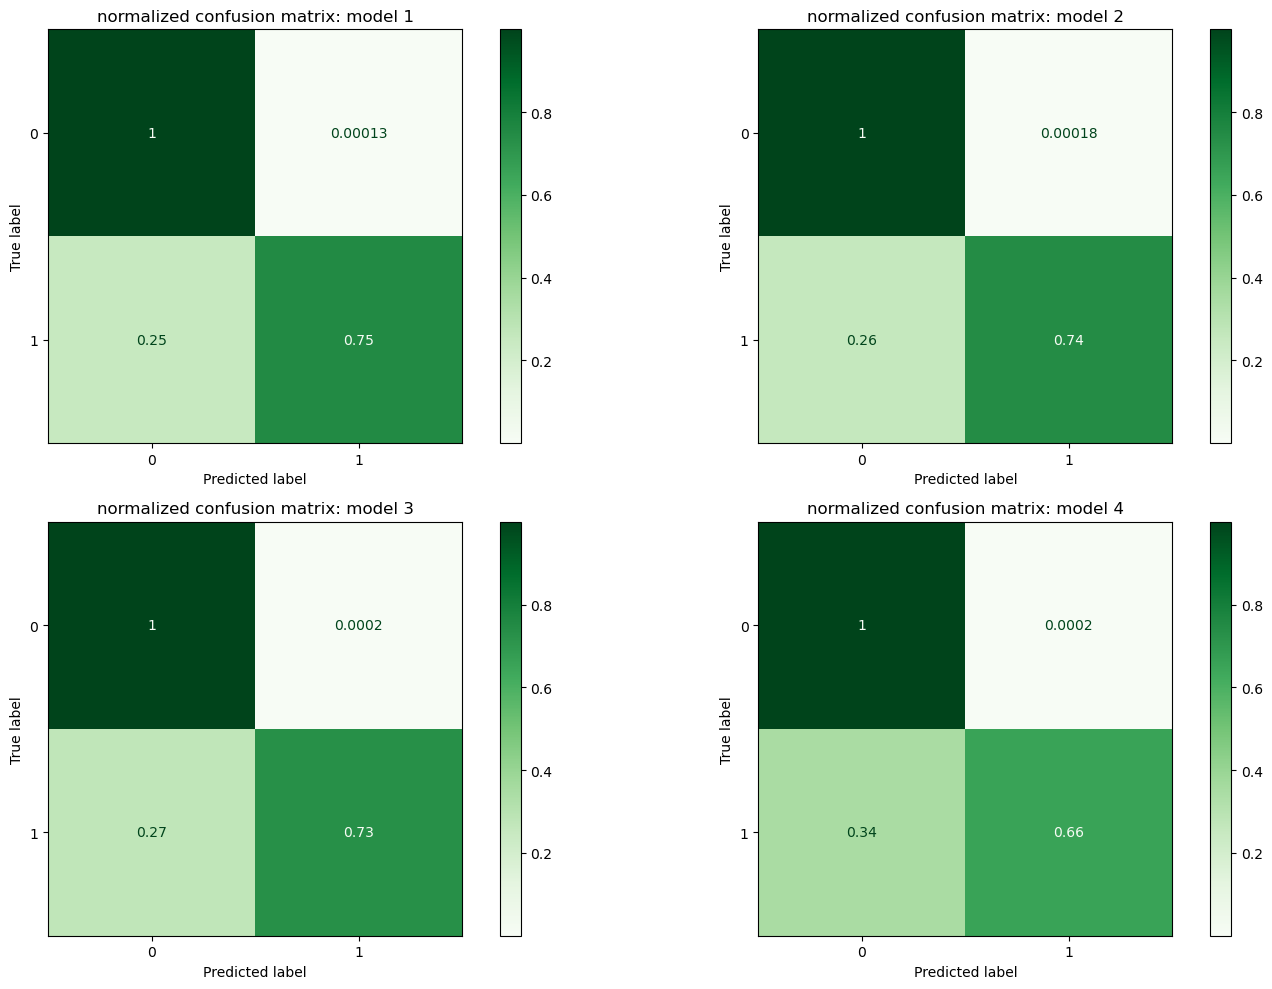

In [17]:
models=[model1,model2,model3,model4]
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flat

for i , model_ in enumerate(models):
    print(f"predicting model:{i+1}")
    peridiction=model_.predict(x_test, verbose=True)
    peridiction= np.round(peridiction) # because we have binary output in data
    c_matrix= confusion_matrix(y_test, peridiction)
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=('0','1'))
    disp.plot(ax=axes[i] ,cmap="Greens") 

    axes[i].set_title(f"confusion matrix: model {i+1}")

plt.tight_layout()
plt.show()

# it can be seen that because we have a nonequal distribution of classes in the data set, the color of the confusion_matrix is biased, so i use a normalized confusion matrix:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flat

for i , model_ in enumerate(models):
    print(f"predicting model:{i+1}")
    peridiction=model_.predict(x_test, verbose=True)
    peridiction= np.round(peridiction) # because we have binary output in data
    c_matrix= confusion_matrix(y_test, peridiction)
    c_matrix_normal = c_matrix.astype('float') / c_matrix.sum(axis=1, keepdims=True)

    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_normal, display_labels=('0','1'))
    disp.plot(ax=axes[i] ,cmap="Greens") 

    axes[i].set_title(f"normalized confusion matrix: model {i+1}")

plt.tight_layout()
plt.show()



In [18]:
# accuracy, precision, recall, f1-score:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for i , model_ in enumerate(models):
    peridiction=model_.predict(x_test, verbose=True)
    peridiction= np.round(peridiction) # because we have binary output in data
    accuracy = np.round(accuracy_score(y_test,peridiction),4)
    precision = np.round(precision_score(y_test, peridiction),4)
    recall = np.round(recall_score(y_test,peridiction),4)
    f1= np.round(f1_score(y_test, peridiction),4)
    
    print(f"for model {i+1}: accuracy_score is {accuracy}--> precision_score is {precision}\
          -->recall_score is {recall}--> f1_score is {f1}")
    

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step
for model 1: accuracy_score is 0.9994--> precision_score is 0.9098          -->recall_score is 0.75--> f1_score is 0.8222
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step
for model 2: accuracy_score is 0.9994--> precision_score is 0.88          -->recall_score is 0.7432--> f1_score is 0.8059
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step
for model 3: accuracy_score is 0.9993--> precision_score is 0.864          -->recall_score is 0.7297--> f1_score is 0.7912
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step
for model 4: accuracy_score is 0.9992--> precision_score is 0.8509          -->recall_score is 0.6554--> f1_score is 0.7405


ROC and AUC:

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 294us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 322us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step


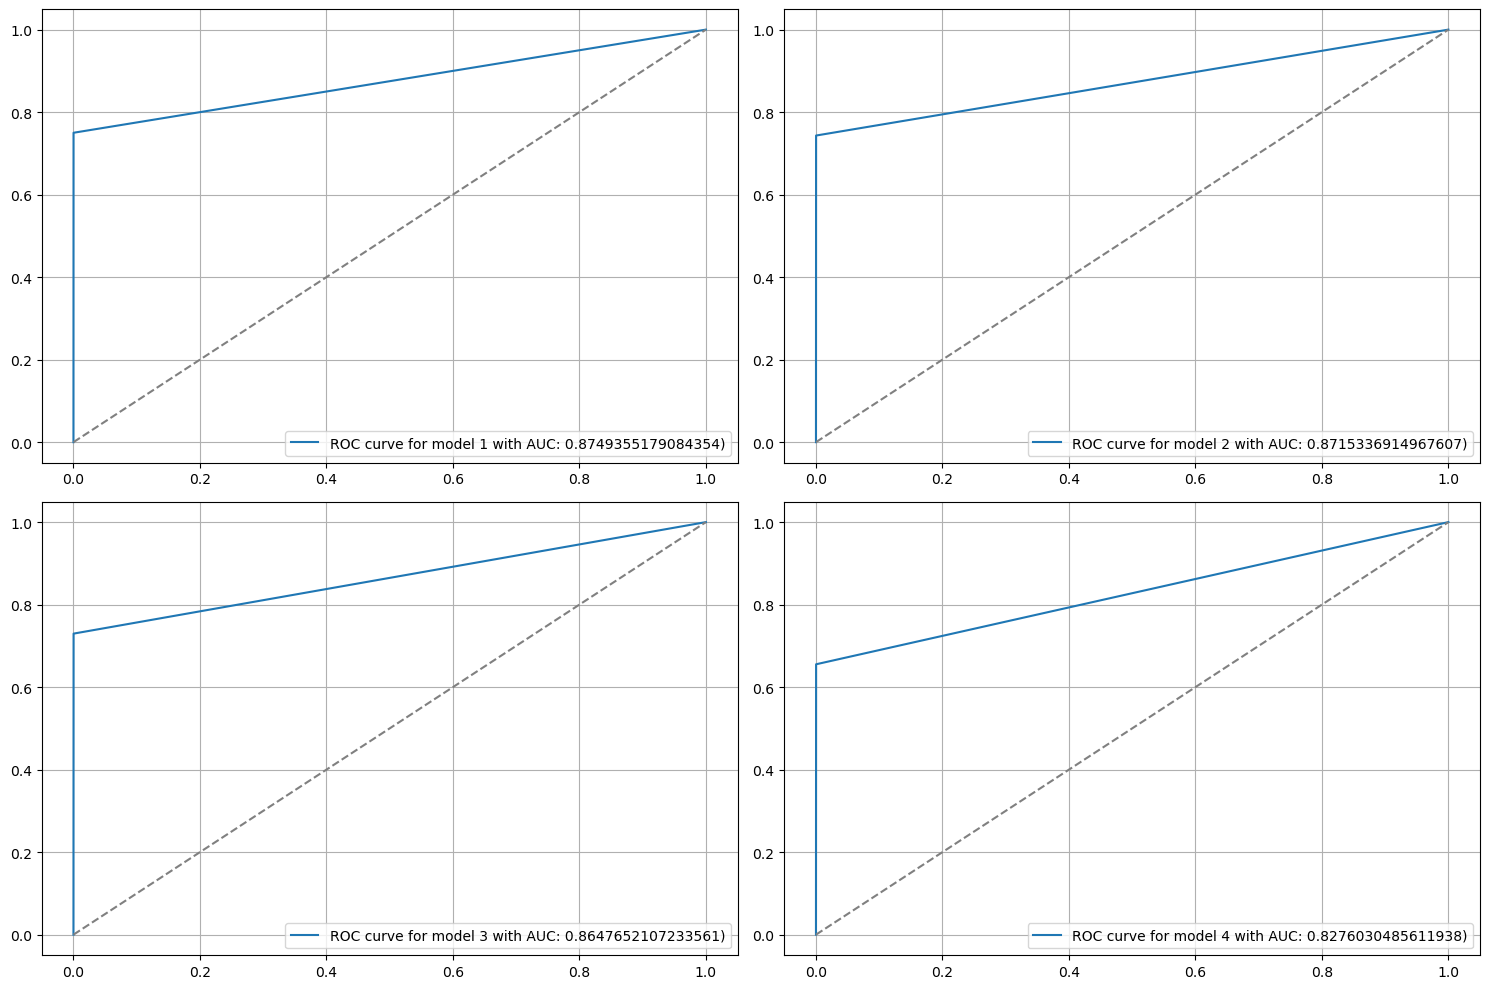

In [19]:
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flat

for i , model_ in enumerate(models):
    peridiction=model_.predict(x_test, verbose=True)
    peridiction= np.round(peridiction) # because we have binary output in data
    # ROC and AUC:
    fpr, tpr, _ = roc_curve(y_test, peridiction)
    roc_auc = auc(fpr, tpr)

    #plot:
    axes[i].plot(fpr, tpr, label=f'ROC curve for model {i+1} with AUC: {roc_auc})')
    axes[i].plot([0, 1], [0, 1], color='gray', linestyle='--') 
    axes[i].legend(loc='lower right')
    axes[i].grid()
    
plt.tight_layout()
plt.show()
    

Q1: 4-1-1:

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout
from keras.regularizers import l2

row, columns = np.shape(x_scaled)
first_hidden_layer_neurons = 128
second_hidden_layer_neurons = 64

model_2layer= Sequential([ 
    Input(shape=(columns,)),
    Dense(first_hidden_layer_neurons, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(second_hidden_layer_neurons, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_2layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2layer=model_2layer.fit(x_train, y_train, epochs=40, batch_size=32,validation_split=0.2)

Epoch 1/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 5s 901us/step - accuracy: 0.9980 - loss: 0.0219 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 2/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step - accuracy: 0.9993 - loss: 0.0053 - val_accuracy: 0.9993 - val_loss: 0.0052
Epoch 3/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 867us/step - accuracy: 0.9994 - loss: 0.0051 - val_accuracy: 0.9991 - val_loss: 0.0057
Epoch 4/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0049
Epoch 5/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 827us/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0057
Epoch 6/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 825us/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0048
Epoch 7/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0045
Epoch 8/40
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 4s 820us/step - accuracy: 0.9993 -

Q1: 4-1-2:

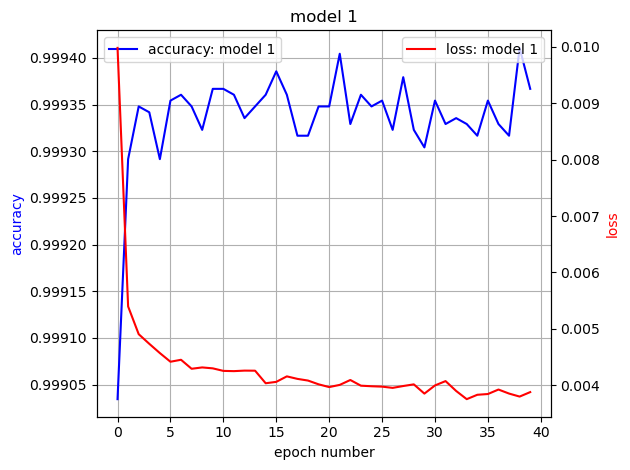

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step


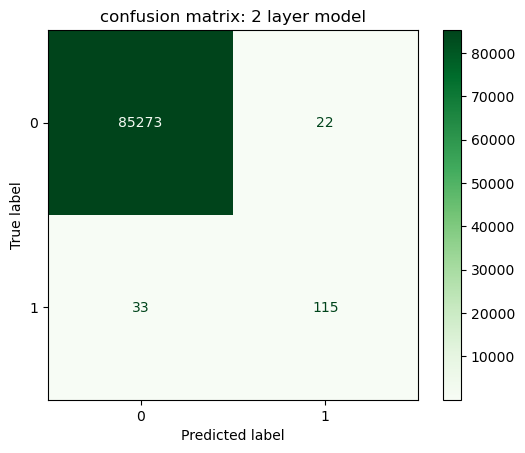

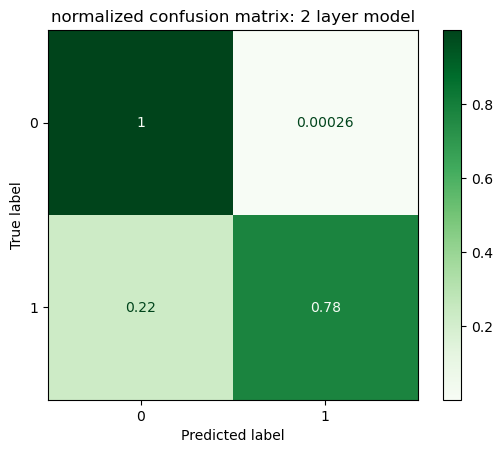

for model 1: accuracy_score is 0.9994--> precision_score is 0.8394        -->recall_score is 0.777--> f1_score is 0.807


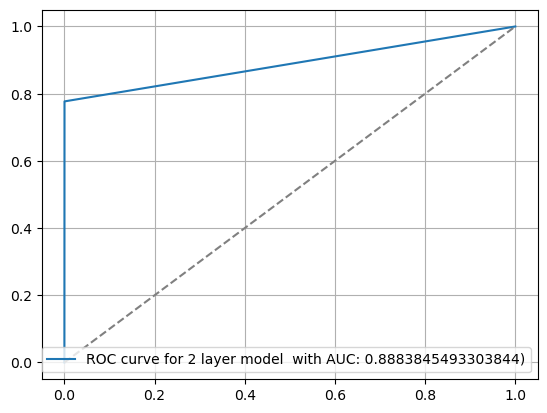

In [21]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

histories=[history_2layer]
fig, axes = plt.subplots()

for i, history in enumerate(histories):
    accuracy_data= history.history['accuracy']
    loss_data= history.history['loss']

    axes2 = axes.twinx() 

    axes.plot(accuracy_data, label=f'accuracy: model {i+1}',color = 'b')
    axes.set_ylabel('accuracy', color='b')

    axes2.plot(loss_data, label=f'loss: model {i+1}', color='r')
    axes2.set_ylabel('loss', color='r')

    axes.set_title(f'model {i+1}')
    axes.set_xlabel('epoch number')

    axes.legend()
    axes2.legend()
    axes.grid(True)

plt.tight_layout()
plt.show()


# confusion matrix:
peridiction=model_2layer.predict(x_test, verbose=True)
peridiction= np.round(peridiction) 

c_matrix= confusion_matrix(y_test, peridiction)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=('0','1'))
disp.plot(cmap="Greens") 

plt.title(f"confusion matrix: 2 layer model")
plt.show()


c_matrix_normal = c_matrix.astype('float') / c_matrix.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_normal, display_labels=('0','1'))
disp.plot(cmap="Greens") 

plt.title(f"normalized confusion matrix: 2 layer model")
plt.show()

# accuracy, precision, recall, f1:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = np.round(accuracy_score(y_test,peridiction),4)
precision = np.round(precision_score(y_test, peridiction),4)
recall = np.round(recall_score(y_test,peridiction),4)
f1= np.round(f1_score(y_test, peridiction),4)

print(f"for model {i+1}: accuracy_score is {accuracy}--> precision_score is {precision}\
        -->recall_score is {recall}--> f1_score is {f1}")

# ROC and AUC:

fpr, tpr, _ = roc_curve(y_test, peridiction)
roc_auc = auc(fpr, tpr)

#plot:
plt.plot(fpr, tpr, label=f'ROC curve for 2 layer model  with AUC: {roc_auc})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.legend(loc='lower right')
plt.grid()
plt.show()

Q1: 6-1: grid search:

In [25]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout
from keras.regularizers import l2

# defining a function that creates our network:
def create_model (hidden_layer_neurons, dropout_ratio, regular):
        model = Sequential([
        Input(shape=(30,)),
        Dense(hidden_layer_neurons, activation='relu', kernel_regularizer=l2(regular)),
        Dropout(dropout_ratio),
        Dense(1, activation='sigmoid') ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

### test setup:
# param_grid = {
#     'model__hidden_layer_neurons': [64],
#     'model__dropout_ratio': [0.2,0.3],
#     'model__regular': [0.001],
#     'batch_size': [32]
# }
# model = KerasClassifier(model=create_model, epochs=3, verbose=1)

param_grid = {
    'model__hidden_layer_neurons': [64, 128, 256],
    'model__dropout_ratio': [0.2, 0.3, 0.4],
    'model__regular':  [0.001, 0.0001],
    'batch_size':  [16, 32, 64]
}

model = KerasClassifier(model=create_model, epochs=40, verbose=1)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=2, scoring='f1')
grid_result = grid.fit(x_train, y_train)


2025-03-19 02:24:02.292957: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 02:24:02.293905: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 02:24:02.297638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 02:24:02.306582: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742338442.322867  133821 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742338442.32

Epoch 1/40
Epoch 1/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - accuracy: 0.9975 - loss: 0.0318
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 754us/step - accuracy: 0.9986 - loss: 0.0292
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 769us/step - accuracy: 0.9988 - loss: 0.0078
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 781us/step - accuracy: 0.9988 - loss: 0.0079
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 762us/step - accuracy: 0.9989 - loss: 0.0077
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step - accuracy: 0.9991 - loss: 0.0061
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 764us/step - accuracy: 0.9991 - loss: 0.0064
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 763us/step - accuracy: 0.9991 - loss: 0.0065
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - accuracy: 0.9990 - loss: 0.0058
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - accuracy: 0.9992 - loss: 0.0051
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - accuracy: 0.9991 - loss: 0.0060

/home/ali/anaconda3/envs/NNnoGPU/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 927us/step - accuracy: 0.9991 - loss: 0.0046
2304/6231 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step

2025-03-19 03:34:53.043304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 03:34:53.044579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:34:53.048009: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:34:53.058235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742342693.076115  181692 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742342693.08

6231/6231 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step


E0000 00:00:1742342695.160382  181692 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742342695.179679  181692 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/40
2850/6231 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.9986 - loss: 0.0365

2025-03-19 03:34:58.536444: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 03:34:58.537707: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:34:58.541372: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 03:34:58.552038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742342698.569390  181818 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742342698.57

5014/6231 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9986 - loss: 0.0273

E0000 00:00:1742342700.644081  181818 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742342700.665108  181818 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


5304/6231 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9986 - loss: 0.0266Epoch 1/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 931us/step - accuracy: 0.9986 - loss: 0.0246
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9971 - loss: 0.0270
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9989 - loss: 0.0079
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9989 - loss: 0.0078
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9988 - loss: 0.0077
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 998us/step - accuracy: 0.9989 - loss: 0.0079
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9989 - loss: 0.0084
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9989 - loss: 0.0075
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9988 - loss: 0.0075
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9990 - loss: 0.0076
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━

2025-03-19 04:23:00.637614: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 04:23:00.639011: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 04:23:00.642984: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 04:23:00.654308: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742345580.673485  241115 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742345580.67

3116/3116 ━━━━━━━━━━━━━━━━━━━━ 2s 511us/step


E0000 00:00:1742345582.609510  241115 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742345582.627986  241115 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.9786 - loss: 0.0944
Epoch 2/40
 282/1558 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.9986 - loss: 0.0121

2025-03-19 04:23:05.022500: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 04:23:05.023753: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 04:23:05.027299: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-19 04:23:05.037120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742345585.054512  241242 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742345585.05

1558/1558 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.9986 - loss: 0.0114
Epoch 3/40
 981/1558 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9988 - loss: 0.0079

E0000 00:00:1742345587.045360  241242 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742345587.067480  241242 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1155/1558 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9988 - loss: 0.0080Epoch 1/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - accuracy: 0.9988 - loss: 0.0082
Epoch 4/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9988 - loss: 0.0078
Epoch 5/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0827  
Epoch 2/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9988 - loss: 0.0076
Epoch 6/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9986 - loss: 0.0107  
Epoch 3/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9989 - loss: 0.0068
Epoch 7/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 988us/step - accuracy: 0.9987 - loss: 0.0083
Epoch 4/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.9989 - loss: 0.0067
Epoch 8/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.9987 - loss: 0.0081
Epoch 5/40
1558/1558 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9989 - loss: 0.0062  
Epoch 9/40
1558/1558 ━━━

In [26]:
import pickle

with open("grid_result.pkl", "wb") as f:
    pickle.dump(grid_result, f)

In [35]:
print( grid_result.best_params_)
print( grid_result.best_score_)

{'batch_size': 16, 'model__dropout_ratio': 0.2, 'model__hidden_layer_neurons': 64, 'model__regular': 0.0001}
0.8167438271604939


In [32]:
pd.DataFrame(grid.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_model__dropout_ratio,param_model__hidden_layer_neurons,param_model__regular,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,201.630448,0.192791,5.923642,0.146679,16,0.2,64,0.0010,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.452991,0.678571,0.565781,0.112790,54
1,307.945593,1.231357,5.179054,0.050884,16,0.2,64,0.0001,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.812500,0.820988,0.816744,0.004244,1
2,313.338980,0.597986,5.258481,0.071729,16,0.2,128,0.0010,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.764706,0.785942,0.775324,0.010618,21
3,300.536634,2.553250,5.220900,0.089691,16,0.2,128,0.0001,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.801262,0.774194,0.787728,0.013534,14
4,314.282326,1.785051,5.396236,0.147243,16,0.2,256,0.0010,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.782051,0.614232,0.698142,0.083910,43
5,252.553210,0.517234,4.285483,0.185744,16,0.2,256,0.0001,"{'batch_size': 16, 'model__dropout_ratio': 0.2...",0.805031,0.762215,0.783623,0.021408,18
6,241.112735,0.024162,4.086699,0.140803,16,0.3,64,0.0010,"{'batch_size': 16, 'model__dropout_ratio': 0.3...",0.721649,0.639706,0.680678,0.040972,47
7,241.208823,0.608664,4.143548,0.076920,16,0.3,64,0.0001,"{'batch_size': 16, 'model__dropout_ratio': 0.3...",0.792332,0.736486,0.764409,0.027923,28
8,246.643134,0.412082,4.168167,0.062239,16,0.3,128,0.0010,"{'batch_size': 16, 'model__dropout_ratio': 0.3...",0.727891,0.450216,0.589054,0.138837,53
9,246.184544,0.346325,4.110746,0.067042,16,0.3,128,0.0001,"{'batch_size': 16, 'model__dropout_ratio': 0.3...",0.793651,0.761589,0.777620,0.016031,19


In [31]:
with open("grid.pkl", "wb") as f:
    pickle.dump(grid, f)

In [29]:
grid.param_grid

{'model__hidden_layer_neurons': [64, 128, 256],
 'model__dropout_ratio': [0.2, 0.3, 0.4],
 'model__regular': [0.001, 0.0001],
 'batch_size': [16, 32, 64]}

Best network:

In [15]:
# Best : {'batch_size': 16, 'model__dropout_ratio': 0.2, 'model__hidden_layer_neurons': 64, 'model__regular': 0.0001}
# Best Score: 0.8167438271604939

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout
from keras.regularizers import l2
row, columns = np.shape(x_scaled)
# bset parameters:

batchsize=16
dropout_ratio=0.2

hidden_layer_neurons = 64
regular = 0.0001

model_best= Sequential([ 
    Input(shape=(columns,)),
    Dense(hidden_layer_neurons, kernel_regularizer=l2(regular), activation='relu'),
    Dropout(dropout_ratio),
    Dense(1, activation='sigmoid')
])

model_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_best=model_best.fit(x_train, y_train, epochs=40, batch_size=batchsize,validation_split=0.5)

Epoch 1/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9987 - loss: 0.0163 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9991 - val_loss: 0.0052
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9992 - loss: 0.0049 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9992 - val_loss: 0.0133
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9992 - loss: 0.0041 - 

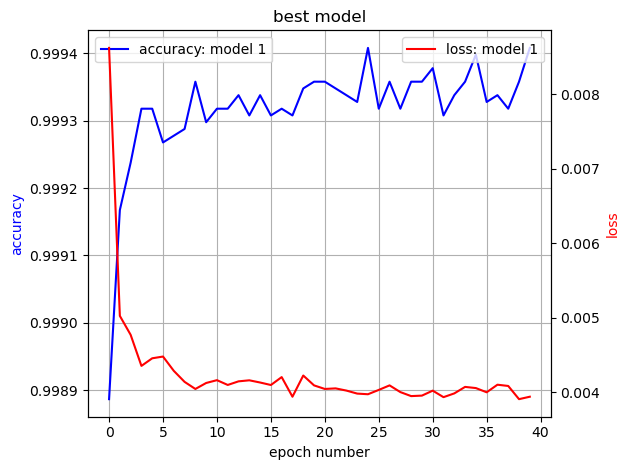

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step


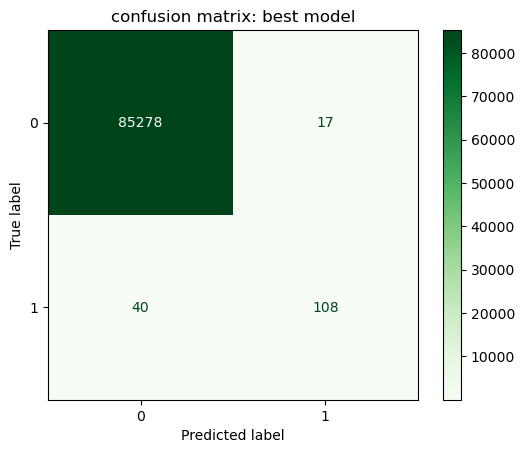

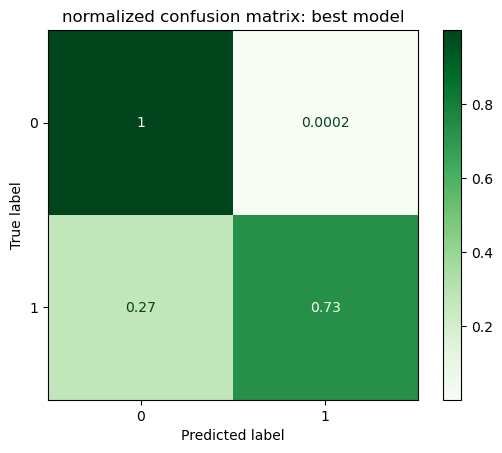

for model 1: accuracy_score is 0.9993--> precision_score is 0.864        -->recall_score is 0.7297--> f1_score is 0.7912


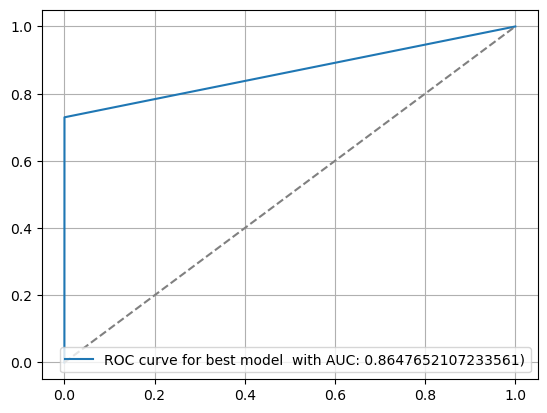

In [16]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
histories=[history_best]
fig, axes = plt.subplots()

for i, history in enumerate(histories):
    accuracy_data= history.history['accuracy']
    loss_data= history.history['loss']

    axes2 = axes.twinx() 

    axes.plot(accuracy_data, label=f'accuracy: model {i+1}',color = 'b')
    axes.set_ylabel('accuracy', color='b')

    axes2.plot(loss_data, label=f'loss: model {i+1}', color='r')
    axes2.set_ylabel('loss', color='r')

    axes.set_title(f'best model')
    axes.set_xlabel('epoch number')

    axes.legend()
    axes2.legend()
    axes.grid(True)

plt.tight_layout()
plt.show()


# confusion matrix:
peridiction=model_best.predict(x_test, verbose=True)
peridiction= np.round(peridiction) 

c_matrix= confusion_matrix(y_test, peridiction)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=('0','1'))
disp.plot(cmap="Greens") 

plt.title(f"confusion matrix: best model")
plt.show()


c_matrix_normal = c_matrix.astype('float') / c_matrix.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_normal, display_labels=('0','1'))
disp.plot(cmap="Greens") 

plt.title(f"normalized confusion matrix: best model")
plt.show()

# accuracy, precision, recall, f1:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = np.round(accuracy_score(y_test,peridiction),4)
precision = np.round(precision_score(y_test, peridiction),4)
recall = np.round(recall_score(y_test,peridiction),4)
f1= np.round(f1_score(y_test, peridiction),4)

print(f"for model {i+1}: accuracy_score is {accuracy}--> precision_score is {precision}\
        -->recall_score is {recall}--> f1_score is {f1}")

# ROC and AUC:

fpr, tpr, _ = roc_curve(y_test, peridiction)
roc_auc = auc(fpr, tpr)

#plot:
plt.plot(fpr, tpr, label=f'ROC curve for best model  with AUC: {roc_auc})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.legend(loc='lower right')
plt.grid()
plt.show()